### Elias Villaseñor Flores
### 1735689
### Grupo 051
### Estadística Aplicada


## 1. Introducción
#### Analizaremos un problema de supervivencia sobre creditos, la base de datos que analizaremos muestra el tiempo que transcurre desde que un cliente pide un préstamo hasta que lo paga completamente, a esto lo llamamos evento.

## 2. Comenta quien podría estar interesado en el análisis de supervivencia de tu base de datos, y por qué consideras importante realizar un modelo de supervivencia para tu base de datos (¿qué nos permite conocer o saber?)
#### Es muy importante para el banco que nos proporciono la base de datos conocer los resultados de nuestro analisis de supervivencia, debido a que podrian saber el riesgo de pagar o no un prestamo dadas las circunstancias del cliente (variables) como lo son el que rente o sea dueño de una casa, que tenga telefono, si ya tiene otros adeudos, etc.

## 3. Comenta si tu base de datos posee censura (y en tu caso qué significa la censura para tu base de datos en particular)
#### Nuestra base de datos si cuenta con censura en el apartado de full_repaid, 1 significa que si pago su adeudo y 0 significa que no se ti

## 4. Convierte las variables de opciones a categóricas, es decir, si tienes (si, no, no se) convierte a (1, 2 ,3). Convierte las dummys tambien.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [80]:
credito = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
credito 

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,real_estate,31,None,own,1,unskilled,1,0,1,1
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,life_insurance,40,None,own,1,management,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,other,38,None,own,1,official,1,0,1,1
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,no_property,23,None,free,1,official,1,1,1,0


In [97]:
credito = pd.get_dummies(credito,'checking_account_status', drop_first=True )
credito = pd.get_dummies(credito,'credit_history', drop_first=True )
credito= pd.get_dummies(credito,'purpose', drop_first=True )
credito = pd.get_dummies(credito,'savings_account_status', drop_first=True )
credito = pd.get_dummies(credito,'employment_years', drop_first=True )
credito = pd.get_dummies(credito,'personal_status', drop_first=True )
credito = pd.get_dummies(credito,'other_debtors', drop_first=True )
credito = pd.get_dummies(credito,'property', drop_first=True )
credito = pd.get_dummies(credito,'other_installment_plans', drop_first=True )
credito = pd.get_dummies(credito,'housing', drop_first=True )
credito = pd.get_dummies(credito,'job', drop_first=True )
credito

,duration,amount,installment_rate,present_residence,age,number_of_credits,people_liable,telephone,foreign_worker,full_repaid,...,checking_account_status_no_property,checking_account_status_other,checking_account_status_real_estate,checking_account_status_bank,checking_account_status_stores,checking_account_status_own,checking_account_status_rent,checking_account_status_official,checking_account_status_unemployed,checking_account_status_unskilled
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,1,0,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
997,12,804,4,4,38,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
998,45,1845,4,4,23,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0


## 5. Cerciórate de no tener missing values o valores repetidos, en caso de tenerlos corrige la base de datos
#### No hay valores perdidos o repetidos

## 6. Calcula las estadísticas descriptivas de las variables. Comenta las estadísticas descriptivas de las dummys y de las numéricas.

In [4]:
duracion=credito['duration'].mean()

In [5]:
monto=credito['amount'].mean()

In [6]:
edad=credito['age'].mean()

In [7]:
print(f'El promedio de la duración, el monto y la edad de los clientes del banco respectivamente es de',duracion, monto, edad)

El promedio de la duración, el monto y la edad de los clientes del banco respectivamente es de 20.903 3271.258 35.546


In [8]:
duracion1=credito['duration'].max()

In [9]:
monto1=credito['amount'].max()

In [10]:
edad1=credito['age'].max()

In [11]:
print(f'El Maximo de la duración, el monto y la edad de los clientes del banco respectivamente es de',duracion1, monto1, edad1)

El Maximo de la duración, el monto y la edad de los clientes del banco respectivamente es de 72 18424 75


In [12]:
duracion2=credito['duration'].min()

In [13]:
monto2=credito['amount'].min()

In [14]:
edad2=credito['age'].min()

In [15]:
print(f'El Minimo de la duración, el monto y la edad de los clientes del banco respectivamente es de',duracion2, monto2, edad2)

El Minimo de la duración, el monto y la edad de los clientes del banco respectivamente es de 4 250 19


## 7. Calcula el tiempo promedio de supervivencia de la base de datos

In [18]:
pagaron = credito[credito['full_repaid']==1]
nopagaron = credito[credito['full_repaid']==0]

In [24]:
tiempo=pagaron['duration'].mean() 

In [23]:
nopagaron['duration'].mean() 


24.86

In [27]:
print(f'El tiempo promedio en meses de los que pagaron su adeudo es de: ',tiempo)

El tiempo promedio en meses de los que pagaron su adeudo es de:  19.207142857142856


## 8. Calcula la función de supervivencia y grafícala utilizando Kaplan-Meier y obtén la mediana ¿qué significa la mediana?

In [29]:
from lifelines import KaplanMeierFitter 


,Tiempo que tardan los clientes en pagar
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


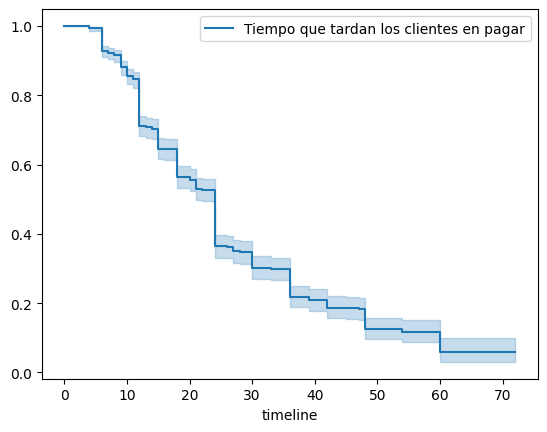

In [39]:
kmf = KaplanMeierFitter(label="Tiempo que tardan los clientes en pagar")
kmf.fit(credito['duration'], credito['full_repaid'])
kmf.plot();
kmf.survival_function_ 

In [41]:
mediana=kmf.survival_function_ .median()
print(f'la Mediana de la funcion de superviencia es de: ',mediana)

la Mediana de la funcion de superviencia es de:  Tiempo que tardan los clientes en pagar    0.527923
dtype: float64


## 9. Elige una variable categórica o construye una (por ejemplo, para la del crédito bancario, si debe 0-250mil dolares, 251-500mil, y mas de 500 mil), y estima y grafica la función de supervivencia para cada grupo

In [86]:
mediana1 = credito['amount'].median() 
credito['deben_poco'] = credito['amount'] < mediana1 
credito['deben_mucho'] = credito['amount'] > mediana1
credito.head(20)

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,deben_poco,deben_mucho
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,None,own,2,official,1,1,1,1,True,False
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,None,own,1,official,1,0,1,0,False,True
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,None,own,1,unskilled,2,0,1,1,True,False
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,None,free,1,official,2,0,1,1,False,True
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,None,free,2,official,2,0,1,0,False,True
5,no_account,36,existing_credit_paid,education,9055,unknown,between_1_4,2,M_single,None,...,None,free,1,unskilled,2,1,1,1,False,True
6,no_account,24,existing_credit_paid,furniture_equipment,2835,between_500_1000,above_7,3,M_single,None,...,None,own,1,official,1,0,1,1,False,True
7,0_to_200,36,existing_credit_paid,car_used,6948,below_100,between_1_4,2,M_single,None,...,None,rent,1,management,1,1,1,1,False,True
8,no_account,12,existing_credit_paid,radio_TV,3059,above_1000,between_4_7,2,M_divorced,None,...,None,own,1,unskilled,1,0,1,1,False,True
9,0_to_200,30,critical_account,car_new,5234,below_100,unemployed,4,M_divorced,None,...,None,own,2,management,1,0,1,0,False,True


## 10.Prueba Si las funciones de supervivencia son distintas usando el log rank test y comenta el resultado

In [89]:
from lifelines.statistics import logrank_test


In [90]:
deben_mucho = credito[credito['deben_mucho'] == True]
deben_poco = credito[credito['deben_poco'] == True]

In [92]:
len(deben_mucho)

500

In [93]:
results = logrank_test(deben_mucho['duration'], deben_poco['duration'], deben_mucho['full_repaid'], deben_poco['full_repaid'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         199.26 <0.005    147.89

#### Podemos confirmar con un 95% de confianza que los que deben mucho tardan mas en pagar que los que deben poco dado que p<0.005


## 1.Ahora estima un modelo de Cox, utilizando todas las variables disponibles para predecir el riesgo de sufrir el evento


In [101]:
from lifelines import CoxPHFitter


In [104]:
credito = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
credito

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,real_estate,31,None,own,1,unskilled,1,0,1,1
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,life_insurance,40,None,own,1,management,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,other,38,None,own,1,official,1,0,1,1
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,no_property,23,None,free,1,official,1,1,1,0


In [110]:
cph= CoxPHFitter()
cph.fit(credito, 'duration', 'full_repaid', formula='C(checking_account_status)+C(job)+C(other_debtors)+C(property)+C(other_installment_plans)+C(employment_years)+C(credit_history)+C(purpose)+C(savings_account_status)+C(foreign_worker)+number_of_credits+C(housing)+telephone+age+C(personal_status)+installment_rate+present_residence+people_liable+amount')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -3954.11
         time fit was run = 2022-11-24 22:36:04 UTC

---
                                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                             
C(checking_account_status)[T.above_200]         0.21       1.24       0.17            -0.13             0.55                 0.88                 1.73
C(checking_account_status)[T.below_0]          -0.37       0.69       0.13            -0.62            -0.12                 0.54                 0.89
C(checking_account_status)[T.no_account]        0.46       1.58       0.10             0.25             0.66                 1.29                 1.94
C(credit_history)[T.critical_account]           0.60       1.82       0.26             0.10             1.10                 1.10                 3.02
C(credit_history)[T.delay_in_paying]            0.25       1.28       0.28            -0.29             0.79                 0.75                 2.20
C(credit_history)[T.existing_credit_paid]       0.37       1.45       0.24            -0.10             0.85                 0.90                 2.34
C(credit_history)[T.no_credit_taken]           -0.10       0.91       0.36            -0.80             0.61                 0.45                 1.83
C(employment_years)[T.below_1]                  0.16       1.17       0.15            -0.13             0.45                 0.88                 1.57
C(employment_years)[T.between_1_4]              0.09       1.09       0.11            -0.13             0.31                 0.88                 1.37
C(employment_years)[T.between_4_7]              0.23       1.26       0.13            -0.02             0.48                 0.98                 1.61
C(employment_years)[T.unemployed]               0.06       1.06       0.21            -0.36             0.48                 0.70                 1.62
C(foreign_worker)[T.1]                         -1.16       0.32       0.20            -1.54            -0.77                 0.21                 0.46
C(housing)[T.own]                               0.05       1.05       0.23            -0.40             0.50                 0.67                 1.65
C(housing)[T.rent]                              0.16       1.17       0.24            -0.32             0.64                 0.73                 1.89
C(job)[T.official]                             -0.37       0.69       0.13            -0.62            -0.12                 0.54                 0.89
C(job)[T.unemployed]                           -0.51       0.60       0.34            -1.17             0.16                 0.31                 1.17
C(job)[T.unskilled]                            -0.20       0.82       0.16            -0.51             0.12                 0.60                 1.13
C(other_debtors)[T.co_applicant ]              -0.12       0.89       0.22            -0.56             0.32                 0.57                 1.37
C(other_debtors)[T.guarantor]                   0.16       1.17       0.18            -0.19             0.50                 0.83                 1.65
C(other_installment_plans)[T.bank]             -0.22       0.80       0.13            -0.46             0.03                 0.63                 1.03
C(other_installment_plans)[T.stores]           -0.31       0.73       0.20            -0.72             0.09                 0.49                 1.09
C(personal_status)[T.M_divorced]               -0.10       0.90       0.13            -0.36             0.15                 0.70                 1.16
C(pers

## 12.Interpreta cada uno de los coeficientes obtenidos. Utiliza cph.plot() para ayudarte con la interpretación

<AxesSubplot: xlabel='log(HR) (95% CI)'>

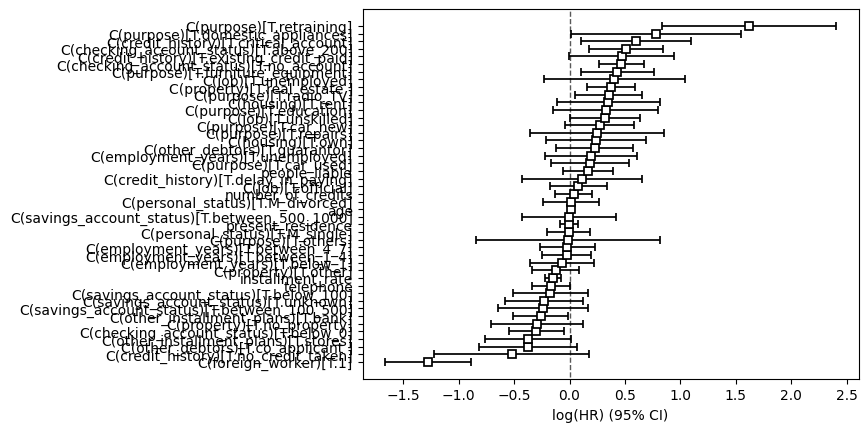

In [106]:
cph.plot()

### intepretaremos solo los coeficientes de las variables que si tienen efecto sobre el riesgo, para esto aplicaremos la sigueinte hipotesis:
### Ho: Variable = 0
### Ha: Variable =/ 0
### Para esto utilizaremos el P-value recordando que si el p-value es menor a .05 se rechaza Ho, esto quiere decir que dicha variable si tiene efecto en el riesgo de pagar el adeudo.

### checking_account_status
    Solo [T.below_0], [T.no_account] tienen efecto en el riesgo de pagar el adeudo en comparacion con las otras variables de chequing_account_status
    debido a que el coeficiente de [T.below_0] es negativo, nos dice que si hay pocas cuentas al corriente, menor el riesgo de pagar el adeudo y como el coeficiente de [T.no_account] es positivo, entre mas cuentas tengas al corriente, mayor el riesgo de pagar el adeudo.
### credit_history
    Solo [T.critical_account] tiene efecto en el riesgo de pagar el adeudo a comparacion de las otras variables de credit_history
    Debido a que el coeficiente de [T.critical_account] es positivo, esto nos dice que entre mas critico este tu cuenta, mayor el riesgo de pagar el adeudo
### purpose
    Solo [T.car_used], [T.furniture_equipment], [T.radio_TV], [T.retraining] tienen efecto en el riesgo de pagar el adeudo e comparacion con las otras variables de purpose
    Debido a que el coeficiente es positivo, esto quiere decir a que si el prestamo fue pedido por estas razones, el riesgo de pagar el adeudo aumenta.
### amount
    Si tiene efecto en el riesgo de pagar el adeudo.
    Debido a que el coeficiente de amount es negativo, esto nos dice que entre mayor sea el prestamo, menor el riesgo de pagar el adeudo.
### savings_account_status
    Ninguno tiene efecto en el riesgo de pagar el adeudo.
### employment_years
    Ninguno tiene efecto en el riesgo de pagar el adeudo.
### installment_rate
    Si tiene efecto en el riesgo de pagar el adeudo
    Debido a que el coeficiente de installment_rate es negativo, esto nos dice que entre menor sea el procentaje de dinero pueso a disposicion de prestatarios, menor sera el riesgo de pagar el adeudo
### personal_status 
    No tiene efecto en el riesgo de pagar el adeudo
### other_debtors 
    No tiene efecto en el riesgo de pagar el adeudo
### property
    solo [T.real_estate ] tiene efecto en el riesgo de pagar el adeudo
    Debido a que el coeficiente de [T.real_estate ] es positivo, esto nos indica que si el cliente tiene como activos valiosos vienes raices, mayor sera el riesgo de pagar el adeudo
### age
    Si tiene efecto en el riesgo de pagar el adeudo
    debido a que el coeficiente de age es positivo, nos dice que a mayor edad tenga el cliente, mayor el riesgo de no pagar el adeudo.
### other_installment_plans
    Ninguno tiene efecto en el riesgo de pagar el adeudo
### housing
    Solo [T. Free] tiene efecto en el riesgo de pagar el adeduo a comparacion de las otras 2 variables de housing
### number_of_credits
    No tiene efecto en el riesgo de pagar el adeudo
### job
    Solo [T.official] tiene efecto en el riesgo de pagar el adeudo
    Debido a que [T.official] tiene un coeficiente negativo, esto nos indica que si el empleo del cliente no es oficial, menor el riesgo de pagar el adeudo
### people_liable
    No tiene efecto en el riesgo de pagar el adeudo
### telephone
    No tiene efecto en el riesgo de pagar el adeudo
### foreign_worker
    Si tiene efecto en el riesgo de pagar el adeudo
    Debido a que el signo del coef de foreign_worker es negativo, esto nos dice que si no es extrangero, disminuye el ruesgo de pagar el adeudo


## 13. Por último, que recomendaciones se pueden derivar de tu modelo, para el caso del crédito que recomendaciones darías al banco sobre su proceso de otorgamiento de créditos en caso de que quieran que le paguen rápido. Para el caso de empleo, la empresa podría evitar la rotación de personal y en caso de que si, cómo podría hacerlo


#### Como recomendación para el banco seria que tendrian que investigar bien al cliente, principalmente su recidencia o recidencias, si es del pais que es el banco, mejor, ya que esto disminuye el riesgo de no pagar el adeudo. Tambien que tuvieran cuidado con la edad del cliente debido a que entre mayor sea el cliente, mayor el riesgo de que no pague, por lo tanto, se recomeidna no dar prestamos grandes a personas mayores sin una cartilla de buena salud. Tambien se recomienda investigar su trabajo ya que si este no es oficial, podria aumentar el riesgo de que no pague el cliente. Otra recomendación seria preguntarle mas cosas sobre las razones de que haya pedido un prestamo, ya que algunos clientes pueden mentir al dar sus razones y esto podria ser un riesgo para el banco. Y por ultimo, tomar consideraciones sobre el monto del prestamo tomando en cuenta su historial crediticio, debido a que una persona con adeudos podria ser un riesgo para el banco.

## 14.Por ultimo investiga y señala las limitaciones de Kaplan-Meier y del modelo de Cox

#### El modelo de Cox permite calcular el riesgo relativo en función de posibles variables explicativas y asume que, a medida que pasa el tiempo, el riesgo de los dos grupos a comparar varía, pero de forma proporcional el uno con el otro. Esto es una limitación del modelo, ya que no siempre se cumple. Por tanto, antes de aplicar el modelo se debe verificar que efectivamente el riesgo varía de forma proporcional (al hacer las curvas de KaplanMeier para cada uno de los grupos, si el riesgo varía de forma proporcional, las curvas deben ser paralelas y no cruzarse).